In [9]:
# import libraries to the noteboook
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import set_option
import sklearn as sk
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'

# Larger scale for plots
sns.set_context('notebook')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline 

In [10]:
# load data
df = pd.read_csv('Data_Train.xls')

In [11]:
# Check 
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
df.shape

(10683, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


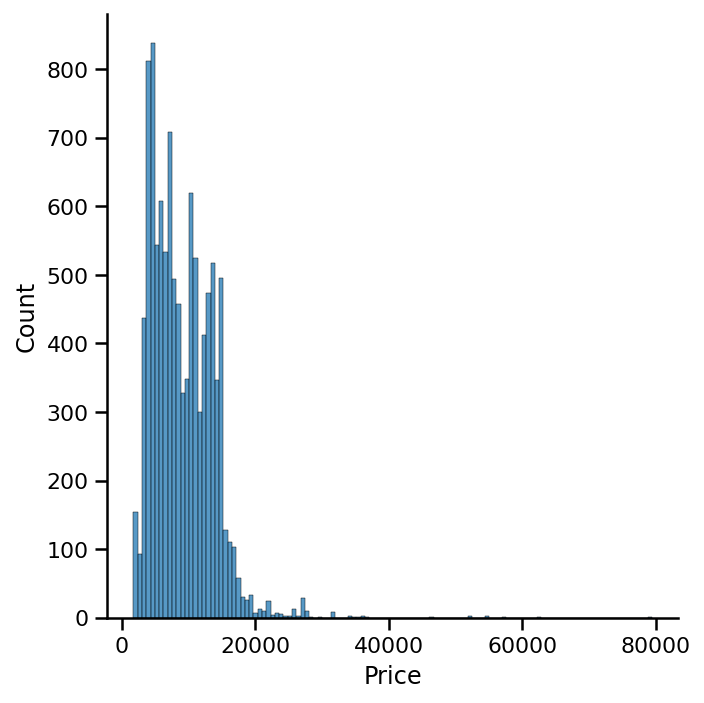

In [14]:
sns.displot(df['Price']);

In [15]:
df.value_counts('Airline')

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
dtype: int64

<Figure size 1440x720 with 0 Axes>

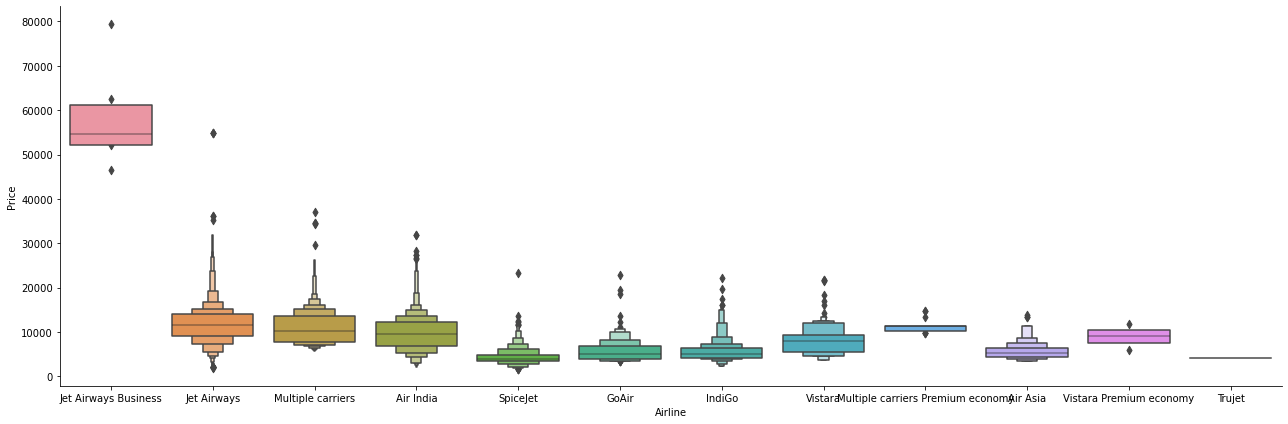

In [8]:
plt.figure(figsize=(20,10))
sns.catplot(x= 'Airline', y= 'Price', data = df.sort_values("Price", ascending = False), kind = 'boxen', height = 6, aspect = 3);




In [9]:
df.value_counts('Source')

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64

<Figure size 1440x720 with 0 Axes>

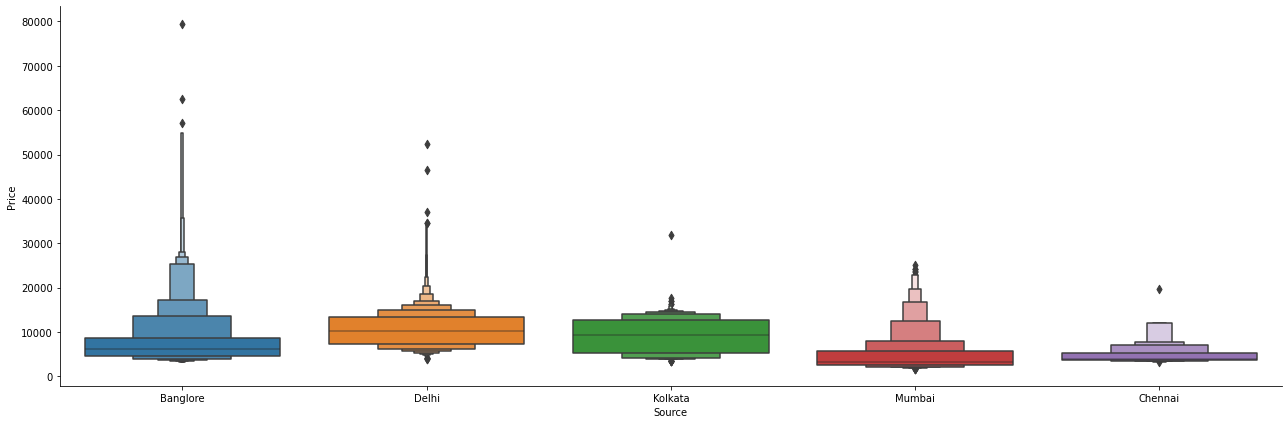

In [10]:
plt.figure(figsize=(20,10))
sns.catplot(x= 'Source', y= 'Price', data = df.sort_values("Price", ascending = False), kind = 'boxen', height = 6, aspect = 3);




In [11]:
df.value_counts('Destination')

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
dtype: int64

<Figure size 1440x720 with 0 Axes>

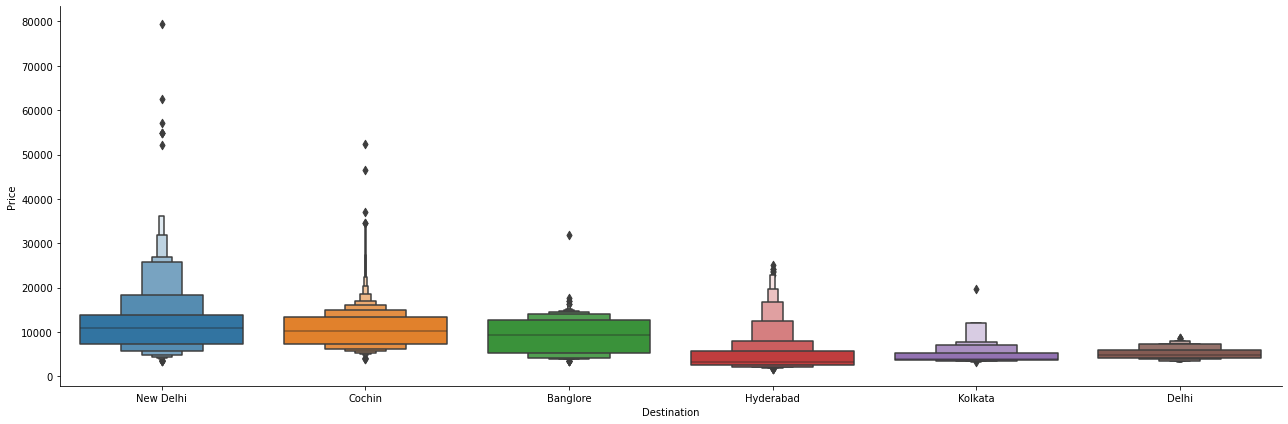

In [12]:
plt.figure(figsize=(20,10))
sns.catplot(x= 'Destination', y= 'Price', data = df.sort_values("Price", ascending = False), kind = 'boxen', height = 6, aspect = 3);




In [13]:
df.value_counts('Total_Stops')

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
dtype: int64

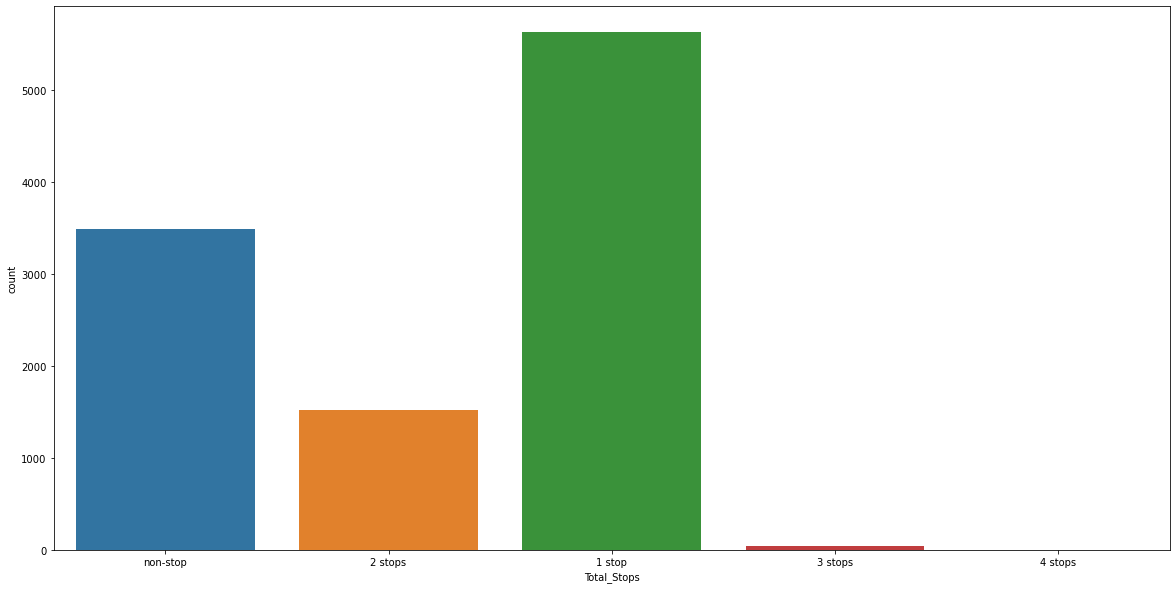

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x= df['Total_Stops'], data=df);


# Feature Engineering 

In [15]:
# Date of Journey

df['day']=df['Date_of_Journey'].str.split('/').str[0]
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  day              10683 non-null  object
 12  month            10683 non-null  object
 13  year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [18]:
# Covert to integer
df['day'] = df['day'].astype(int)

In [19]:
df['month'] = df['month'].astype(int)

In [20]:
df['year'] = df['year'].astype(int)

In [21]:
df.drop(['Date_of_Journey', 'year'], axis=1, inplace= True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [23]:
df['Dep_hour']= df['Dep_Time'].str.split(':').str[0]
df['Dep_min']= df['Dep_Time'].str.split(':').str[1]

In [24]:
df.drop(['Dep_Time'], axis=1, inplace= True)

In [25]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,05,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,09,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,05
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [26]:
df['Dep_hour'] = df['Dep_hour'].astype(int)
df['Dep_min'] = df['Dep_min'].astype(int)

In [27]:
df['Arrival_Time']= df['Arrival_Time'].str.split(' ').str[0]

In [28]:
df['arr_hour']= df['Arrival_Time'].str.split(':').str[0]
df['arr_min']= df['Arrival_Time'].str.split(':').str[1]


In [29]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10,2h 50m,non-stop,No info,3897,24,3,22,20,01,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25,19h,2 stops,No info,13882,9,6,9,25,04,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [30]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10,2h 50m,non-stop,No info,3897,24,3,22,20,01,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25,19h,2 stops,No info,13882,9,6,9,25,04,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [31]:
df['arr_hour'] = df['arr_hour'].astype(int)
df['arr_min'] = df['arr_min'].astype(int)

In [32]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [33]:
df.drop(['Arrival_Time'], axis=1, inplace= True)

In [34]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [35]:
df.value_counts('Total_Stops')

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
dtype: int64

In [36]:
df.isna().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
day                0
month              0
Dep_hour           0
Dep_min            0
arr_hour           0
arr_min            0
dtype: int64

In [37]:
df['Total_Stops'] = df['Total_Stops'].fillna('1 stop')

In [38]:
df.value_counts('Total_Stops')

Total_Stops
1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
dtype: int64

In [39]:
df['Total_Stops']= df['Total_Stops'].replace('non-stop', '0 stop')

In [40]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,0 stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [41]:
df['Total_Stops']= df['Total_Stops'].str.split(' ').str[0]

In [42]:
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [43]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1,No info,13302,1,3,16,50,21,35


In [44]:
df['Route_1']= df['Route'].str.split('?').str[0]
df['Route_2']= df['Route'].str.split('?').str[1]
df['Route_3']= df['Route'].str.split('?').str[2]
df['Route_4']= df['Route'].str.split('?').str[3]
df['Route_5']= df['Route'].str.split('?').str[4]

In [45]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min,arr_hour,arr_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,0,No info,3897,24,3,22,20,1,10,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2,No info,7662,1,5,5,50,13,15,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2,No info,13882,9,6,9,25,4,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1,No info,6218,12,5,18,5,23,30,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1,No info,13302,1,3,16,50,21,35,BLR,NAG,DEL,NaN,NaN


In [46]:
df.drop(['Route'], axis =1, inplace = True)

In [47]:
df.isna().sum()

Airline                0
Source                 0
Destination            0
Duration               0
Total_Stops            0
Additional_Info        0
Price                  0
day                    0
month                  0
Dep_hour               0
Dep_min                0
arr_hour               0
arr_min                0
Route_1                1
Route_2                1
Route_3             3492
Route_4             9117
Route_5            10637
dtype: int64

In [48]:
df.drop(['Duration'], axis =1, inplace = True)

In [49]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min,arr_hour,arr_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,BLR,DEL,NaN,NaN,NaN


In [50]:
le = LabelEncoder()
df['Destination'] = le.fit_transform(df['Destination'])
df['Airline'] = le.fit_transform(df['Airline'])
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])
df['Route_1'] = le.fit_transform(df['Route_1'])
df['Route_2'] = le.fit_transform(df['Route_2'])
df['Route_3'] = le.fit_transform(df['Route_3'])
df['Route_4'] = le.fit_transform(df['Route_4'])
df['Route_5'] = le.fit_transform(df['Route_5'])
df['Source'] = le.fit_transform(df['Source'])

In [51]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min,arr_hour,arr_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897,24,3,22,20,1,10,0,13,29,13,5
1,1,3,0,2,8,7662,1,5,5,50,13,15,2,25,1,3,5
2,4,2,1,2,8,13882,9,6,9,25,4,25,3,32,4,5,5
3,3,3,0,1,8,6218,12,5,18,5,23,30,2,34,3,13,5
4,3,0,5,1,8,13302,1,3,16,50,21,35,0,34,8,13,5


In [52]:
X = df.drop(['Price'], axis = 1)

In [53]:
y=df['Price']

In [54]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
lasmodel = SelectFromModel(Lasso(alpha=0.005, random_state=0))
lasmodel.fit(X_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [55]:
lasmodel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [56]:
Selected_features = X_train.columns[(lasmodel.get_support())]

In [57]:
Selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'day', 'month', 'Dep_hour', 'Dep_min', 'arr_hour', 'arr_min', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [58]:
etr = ExtraTreesRegressor()

In [59]:
etr.fit(X_train, y_train)

ExtraTreesRegressor()

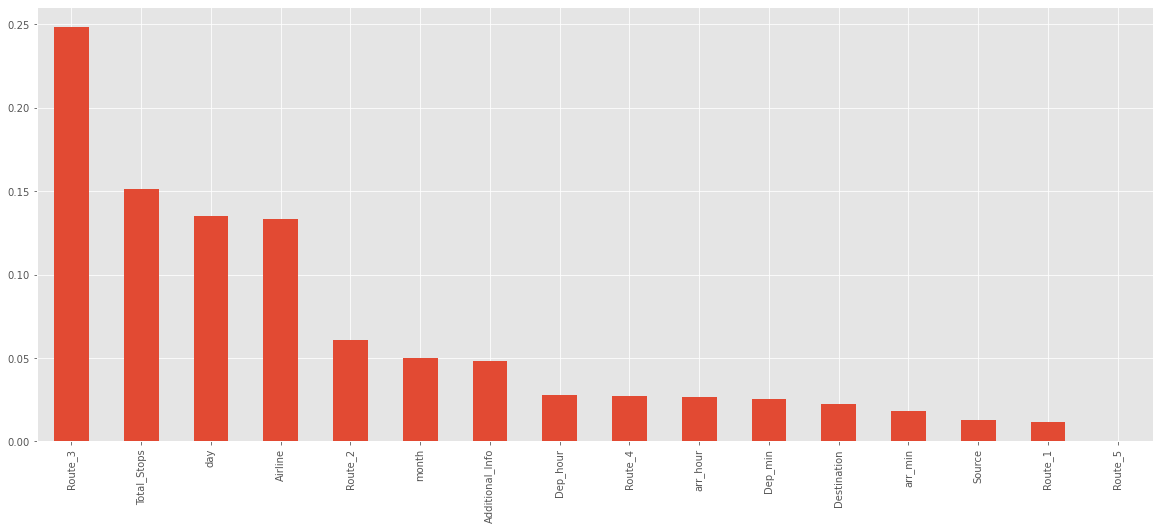

In [60]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
feature_importances = pd.Series(etr.feature_importances_, index=  X.columns)
feature_importances.nlargest(30).plot(kind = 'bar')
plt.show()

In [61]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
rfr.score(X_test, y_test)

0.9179648075889318

In [63]:
predict_rfr = rfr.predict(X_test)

In [64]:
rfr.score(X_train, y_train)

0.980126708240523

In [65]:
mae = metrics.mean_absolute_error(y_test, predict_rfr)


In [66]:
print('The mean absolute error = ', mae )

The mean absolute error =  588.891541234931


In [67]:
mse = metrics.mean_squared_error(y_test, predict_rfr)
print(mse)

1758730.649160311


In [68]:
rmse = np.sqrt(mse)
print(rmse)

1326.171425254032
